In [2]:
#Importing the libraries
from ExoPSI import exopsi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Initializing the class
exopsi = exopsi()

In [3]:
#Loading the dataset
P_df = pd.read_csv(r"phl_exoplanet_catalog.csv") 
new_df = P_df.loc[P_df['P_TEMP_SURF'].isna()==False]
new_df = new_df.loc[new_df['P_RADIUS'].isna()==False]
new_df = new_df.loc[new_df['P_MASS'].isna()==False]
new_df = new_df.loc[new_df['P_ESCAPE'].isna()==False]
new_df = new_df.loc[new_df['P_NAME'].isna()==False]
P_df = new_df
red_df = P_df.loc[:,['P_NAME','P_RADIUS','P_MASS','P_ESCAPE','P_TEMP_SURF']]
red_df.to_csv("reduced phl3.csv")
P_df = red_df
print(P_df)

            P_NAME  P_RADIUS    P_MASS  P_ESCAPE  P_TEMP_SURF
30        55 Cnc e   1.87207  7.990196  2.065940   2066.94610
33        61 Vir b   2.10748  5.085248  1.553368   1214.70880
63    BD-06 1339 b   2.84734  8.581356  1.736034    772.23385
72        CD Cet b   1.81602  3.950602  1.474930    492.19235
110      CoRoT-7 b   1.68150  4.077733  1.557259   1867.63490
...            ...       ...       ...       ...          ...
5204      pi Men c   2.06264  3.629596  1.326531   1203.64660
5210     tau Cet e   1.80481  3.931532  1.475928    328.42972
5211     tau Cet f   1.80481  3.931532  1.475928    208.66189
5212     tau Cet g   1.17705  1.751232  1.219760    661.75475
5213     tau Cet h   1.18826  1.830689  1.241228    488.04629

[2272 rows x 5 columns]


In [22]:
O_df = pd.read_csv(r"S1_spreadsheet_REVISION.csv")
new_df = O_df.loc[O_df['Min. Temp. (°C)'].isna()==False]
new_df = new_df.loc[new_df['Min. Temp. (°C)']!=15]
new_df = new_df.loc[new_df['Max. Temp. (°C)'].isna()==False]
new_df = new_df.loc[new_df['Max. Temp. (°C)']!=15]
new_df = new_df.loc[new_df['Avg. Optimum Temp.'].isna()==False]
new_df = new_df.loc[new_df['Name'].isna()==False]
O_df = new_df
O_df['Min. Temp. (K)'] = O_df['Min. Temp. (°C)'] + 273
O_df['Max. Temp. (K)'] = O_df['Max. Temp. (°C)'] + 273
O_df['Avg. Optimum Temp. (K)'] = O_df['Avg. Optimum Temp.'] + 273
red_df = O_df.loc[:,['Name','Min. Temp. (K)','Max. Temp. (K)','Avg. Optimum Temp. (K)']]
red_df.to_csv("reduced thermobase.csv")
O_df = red_df
O_df = O_df.drop_duplicates('Name')
O_df = O_df.set_index('Name')
print(O_df)

                                 Min. Temp. (K)  Max. Temp. (K)  \
Name                                                              
Methanopyrus kandleri 116                 363.0           395.0   
Geogemma barossii 121                     358.0           394.0   
Pyrolobus fumarii 1A, DSM 11204           363.0           386.0   
Pyrococcus kukulkanii NCB100              343.0           385.0   
Pyrodictium brockii S1                    353.0           383.0   
...                                         ...             ...   
Ilyobacter delafieldii                    283.0           314.0   
Methanolacinia petrolearia                290.0           314.0   
Methanoplanus limicola                    290.0           314.0   
Selenomonas lipolytica                    303.0           314.0   
Selenomonas noxia                         303.0           314.0   

                                 Avg. Optimum Temp. (K)  
Name                                                     
Methanopyrus

In [36]:
for i in O_df.index:
    upper_lims=[1.9,1.5,1.4,O_df.loc[i,'Max. Temp. (K)']]
    lower_lims = [0.5,0.7,0.4,O_df.loc[i,'Min. Temp. (K)']]
    ref_val = [1,1,1,288]
    weights = exopsi.calc_weight(ref_val,upper_lims,lower_lims)
    O_df.loc[i,'W_Temp'] = weights[3]
    


The calculated weight(s) is(are): [0.57, 1.07, 0.7, 6.62]
The calculated weight(s) is(are): [0.57, 1.07, 0.7, 7.0]
The calculated weight(s) is(are): [0.57, 1.07, 0.7, 5.73]
The calculated weight(s) is(are): [0.57, 1.07, 0.7, 7.0]
The calculated weight(s) is(are): [0.57, 1.07, 0.7, 9.88]
The calculated weight(s) is(are): [0.57, 1.07, 0.7, 5.73]
The calculated weight(s) is(are): [0.57, 1.07, 0.7, 5.73]
The calculated weight(s) is(are): [0.57, 1.07, 0.7, 9.88]
The calculated weight(s) is(are): [0.57, 1.07, 0.7, 9.88]
The calculated weight(s) is(are): [0.57, 1.07, 0.7, 10.17]
The calculated weight(s) is(are): [0.57, 1.07, 0.7, 7.21]
The calculated weight(s) is(are): [0.57, 1.07, 0.7, 7.0]
The calculated weight(s) is(are): [0.57, 1.07, 0.7, 7.0]
The calculated weight(s) is(are): [0.57, 1.07, 0.7, 5.73]
The calculated weight(s) is(are): [0.57, 1.07, 0.7, 9.88]
The calculated weight(s) is(are): [0.57, 1.07, 0.7, 8.17]
The calculated weight(s) is(are): [0.57, 1.07, 0.7, 13.25]
The calculated w

In [39]:
options = {}
options['strings_to_formulas'] = False
options['strings_to_urls'] = False
writer = pd.ExcelWriter("PSI_therm.xlsx",engine='xlsxwriter',options=options)
for i in O_df.index[1000:1010]:
    upper_lims=[1.9,1.5,1.4,O_df.loc[i,'Max. Temp. (K)']+273]
    lower_lims = [0.5,0.7,0.4,O_df.loc[i,'Min. Temp. (K)']+273]
    ref_val = [1,1,1,288]
    PSI_data = exopsi.calc_psi(P_df[['P_RADIUS','P_MASS','P_ESCAPE','P_TEMP_SURF']],
                           upper_lims,lower_lims,ref_val,0.8,
                           surf_param=['P_ESCAPE','P_TEMP_SURF'],
                           int_param=['P_RADIUS','P_MASS'],
                           p_index=P_df.loc[:,'P_NAME'])
    if ('/' in i):
        i = i.replace('/','_')
    if len(i) > 31:
        i = i[0:31]
    PSI_data.to_excel(writer, sheet_name=i,index=False)
writer.save()


C:\Users\mailm\AppData\Local\Temp\ipykernel_14644\2521349106.py:4: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  writer = pd.ExcelWriter("PSI_therm.xlsx",engine='xlsxwriter',options=options)


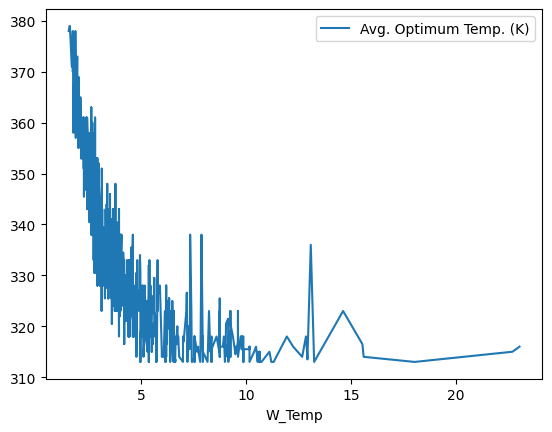

In [44]:
O_df=O_df.sort_values('Avg. Optimum Temp. (K)',ascending=True)
O_df.plot(y = 'Avg. Optimum Temp. (K)', x = 'W_Temp')
plt.show()